# Analysis of Data 

D:/ Data_Large  contains 1000 meshes  and solver_times.csv 

In [1]:
import os
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import meshio

from sklearn.decomposition import PCA
import seaborn as sns

In [2]:
df = pd.read_csv("D:/ML4pmg/Data_Large2/solver_times.csv") # Data_Large, or Data_Large2. or DataLarge3
df.head()

,Mesh #,Fractures #,Combination #,KSP Type,PC Mass,PC Interface,Converged,Krylov Iters,Construction Time (s),Solve Time (s),Total Time (s),Tic Toc Time (s),Solver Label,Adjusted Time (s)
0,0,53,0,gmres,ilu,ilu,False,NaN,NaN,NaN,NaN,NaN,gmres + ilu + ilu,4.221818
1,0,53,1,gmres,sor,ilu,False,NaN,NaN,NaN,NaN,NaN,gmres + sor + ilu,4.221818
2,0,53,2,gmres,jacobi,ilu,False,NaN,NaN,NaN,NaN,NaN,gmres + jacobi + ilu,4.221818
3,0,53,3,gmres,bjacobi,ilu,False,NaN,NaN,NaN,NaN,NaN,gmres + bjacobi + ilu,4.221818
4,0,53,4,gmres,asm,ilu,False,NaN,NaN,NaN,NaN,NaN,gmres + asm + ilu,4.221818


In [3]:
df.describe()

,Mesh #,Fractures #,Combination #,Krylov Iters,Construction Time (s),Solve Time (s),Total Time (s),Tic Toc Time (s),Adjusted Time (s)
count,18000.000000,18000.000000,18000.000000,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000,18000.000000
mean,499.500000,49.908000,8.500000,121.759407,0.070960,0.343594,0.414554,3.507591,3.637192
std,288.683009,6.087824,5.188272,47.776894,0.052091,0.267875,0.313235,1.795629,1.378117
min,0.000000,40.000000,0.000000,32.000000,0.012079,0.044639,0.058275,1.048959,0.058275
25%,249.750000,45.000000,4.000000,95.000000,0.027857,0.163265,0.198124,2.297078,4.221818
50%,499.500000,50.000000,8.500000,109.000000,0.051147,0.236005,0.286574,3.006486,4.221818
75%,749.250000,55.000000,13.000000,121.000000,0.107435,0.446088,0.557332,4.229813,4.221818
max,999.000000,60.000000,17.000000,241.000000,0.312507,1.850007,2.110909,16.096202,4.221818


In [4]:
M = len(df['Solver Label'].unique()) # number of unique solvers

for i in range(M):
    ratio = df[df['Combination #'] == i]['Converged'].mean()
    print(f"Solver {i:02d}: Convergence rate = {ratio:.2f}")


# Count how many converged/failed for each solver label
summary = df.groupby(["Combination #", "Converged"]).size().unstack(fill_value=0)

# Optional: rename columns for clarity
summary.columns = ["Failed", "Converged"] if False in summary.columns else summary.columns



Solver 00: Convergence rate = 0.00
Solver 01: Convergence rate = 0.00
Solver 02: Convergence rate = 0.00
Solver 03: Convergence rate = 0.00
Solver 04: Convergence rate = 0.00
Solver 05: Convergence rate = 0.15
Solver 06: Convergence rate = 0.44
Solver 07: Convergence rate = 0.00
Solver 08: Convergence rate = 0.00
Solver 09: Convergence rate = 0.44
Solver 10: Convergence rate = 0.44
Solver 11: Convergence rate = 0.55
Solver 12: Convergence rate = 0.08
Solver 13: Convergence rate = 0.00
Solver 14: Convergence rate = 0.00
Solver 15: Convergence rate = 0.08
Solver 16: Convergence rate = 0.08
Solver 17: Convergence rate = 0.52


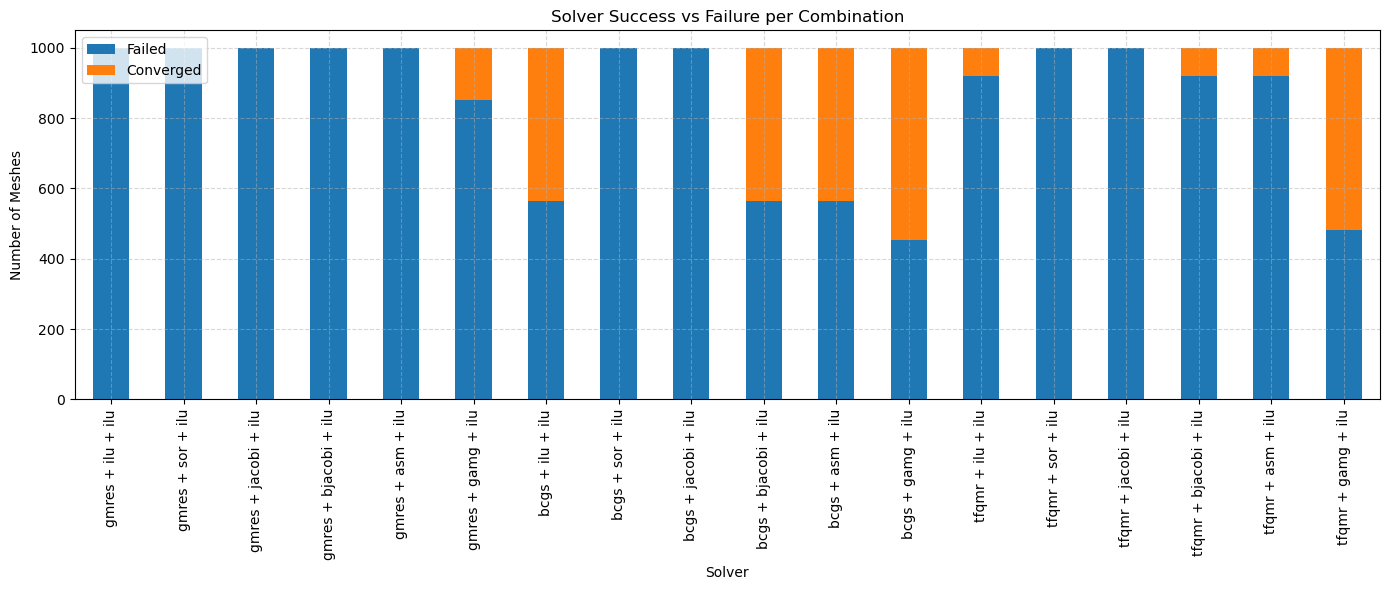

In [5]:
# Plot
summary.plot(kind="bar", stacked=True, figsize=(14, 6))
plt.xlabel("Solver Combination")
plt.ylabel("Number of Meshes")
plt.title("Solver Success vs Failure per Combination")
indices = np.arange(M)
plt.xticks(indices, df["Solver Label"][0:M], rotation=90)
plt.xlabel("Solver")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

In [6]:
# For each mesh, build its 21-d convergence vector
pivot = df.pivot_table(
    index='Mesh #',
    columns='Combination #',
    values='Converged'
).sort_index()

# Convert to integers (0/1), then strings for hashing
vectors = pivot.astype(int).astype(str).agg(''.join, axis=1)

# Count unique convergence patterns
unique_patterns = vectors.nunique()
print(f"Unique convergence patterns: {unique_patterns} / {len(pivot)} total meshes")


Unique convergence patterns: 14 / 1000 total meshes


Unique convergence patterns: 14 / 1000 total meshes



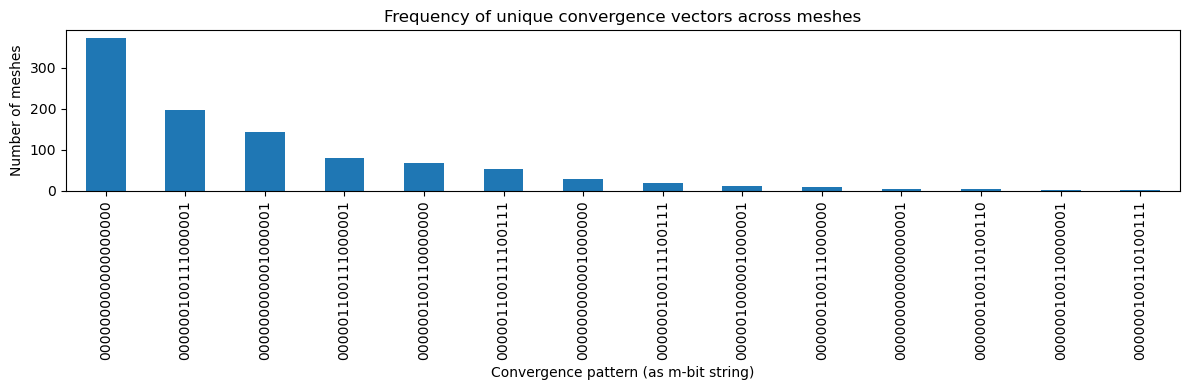

000000000000000000    372
000000100111000001    197
000000000001000001    143
000001100111000001     81
000000100110000000     67
000001100111100111     54
000000000001000000     30
000000100111100111     20
000001000001000001     13
000000100111000000      9
000000000000000001      5
000000100110100110      4
000000100110000001      3
000000100110100111      2
Name: count, dtype: int64


In [7]:
# For each mesh, build its 21-d convergence vector
pivot = df.pivot_table(
    index='Mesh #',
    columns='Combination #',
    values='Converged'
).sort_index()

# Convert True/False to int → then to string → one row per mesh
vectors = pivot.astype(int).astype(str).agg(''.join, axis=1)

# Count how many times each unique pattern appears
pattern_counts = vectors.value_counts()

# Show summary
print(f"Unique convergence patterns: {len(pattern_counts)} / {len(pivot)} total meshes\n")



plt.figure(figsize=(12, 4))
pattern_counts.plot(kind='bar')
plt.ylabel("Number of meshes")
plt.xlabel("Convergence pattern (as m-bit string)")
plt.title("Frequency of unique convergence vectors across meshes")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


print(pattern_counts)

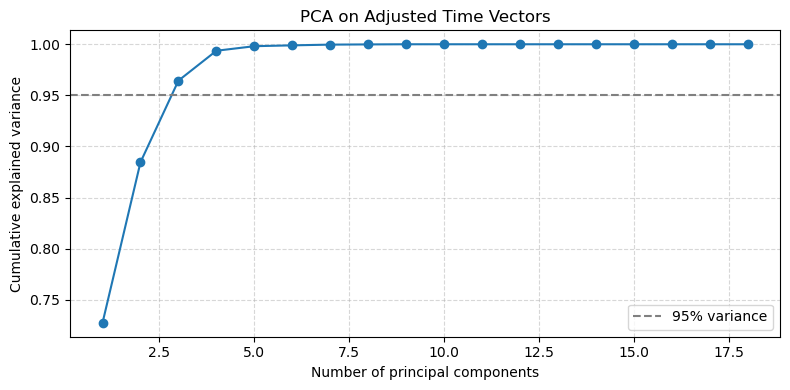

In [8]:

# Pivot adjusted times: rows = mesh IDs, cols = solver combination #
adjusted_pivot = df.pivot_table(
    index='Mesh #',
    columns='Combination #',
    values='Adjusted Time (s)'
).sort_index()

adjusted_log = adjusted_pivot.applymap(lambda x: -np.log(abs(x) + 1e-6))

# Run PCA
pca = PCA()
components = pca.fit_transform(adjusted_log)

# Explained variance
explained = pca.explained_variance_ratio_
cumulative = explained.cumsum()

# Plot cumulative explained variance
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(cumulative) + 1), cumulative, marker='o')
plt.axhline(0.95, color='gray', linestyle='--', label='95% variance')
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative explained variance')
plt.title('PCA on Adjusted Time Vectors')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


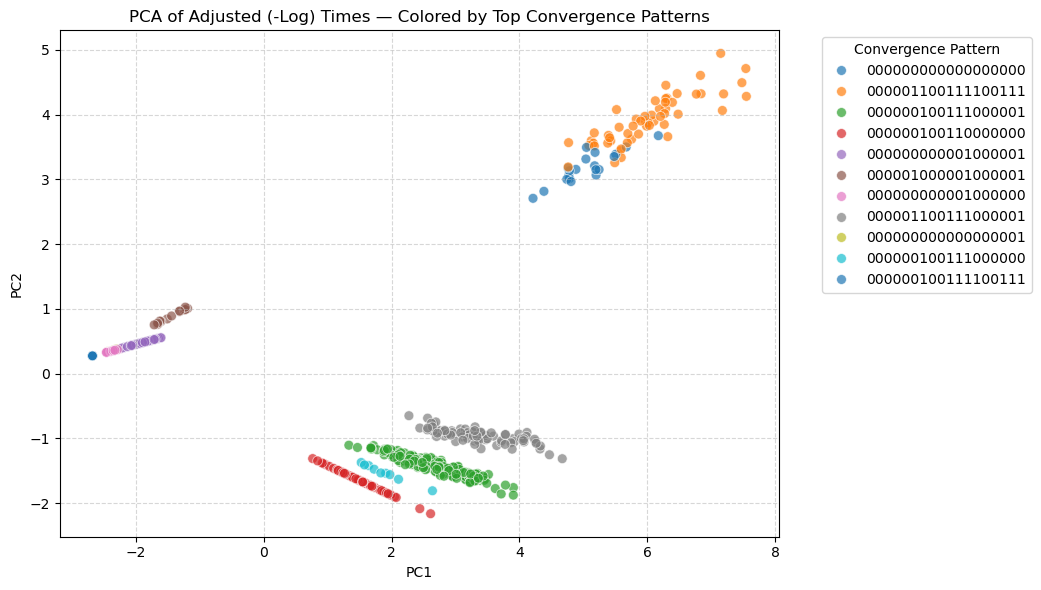

In [9]:

pca_df = pd.DataFrame(components[:, :2], columns=['PC1', 'PC2'])
pca_df['pattern'] = vectors.values

# Plot with color per pattern (most frequent first)
top_patterns = vectors.value_counts().index[:11]  # show only top 5 for clarity
filtered = pca_df[pca_df['pattern'].isin(top_patterns)]

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=filtered,
    x='PC1', y='PC2',
    hue='pattern',
    palette='tab10',
    s=50,
    alpha=0.7
)
plt.title("PCA of Adjusted (-Log) Times — Colored by Top Convergence Patterns")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend(title="Convergence Pattern", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


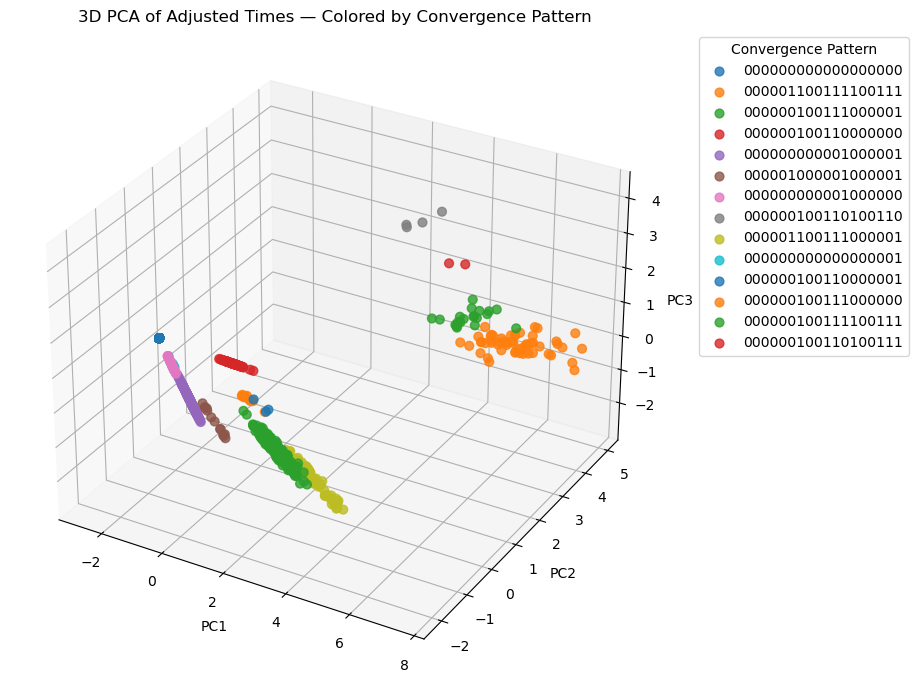

In [10]:
from mpl_toolkits.mplot3d import Axes3D  


pca_df = pd.DataFrame(components[:, :3], columns=['PC1', 'PC2', 'PC3'])
pca_df['pattern'] = vectors.values

# Filter top 11 patterns
top_patterns = vectors.value_counts().index[:M]
filtered = pca_df[pca_df['pattern'].isin(top_patterns)]

# Plot in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Assign unique colors to each pattern
patterns = filtered['pattern'].unique()
colors = plt.cm.tab10.colors  # max 10, loop if needed

for i, pattern in enumerate(patterns):
    subset = filtered[filtered['pattern'] == pattern]
    ax.scatter(
        subset['PC1'], subset['PC2'], subset['PC3'],
        label=pattern,
        s=40,
        alpha=0.8,
        color=colors[i % len(colors)]
    )

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("3D PCA of Adjusted Times — Colored by Convergence Pattern")
ax.legend(title="Convergence Pattern", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [40]:
pca_df

,PC1,PC2,PC3,pattern
0,-2.684108,0.275832,0.445111,000000000000000000
1,-2.684108,0.275832,0.445111,000000000000000000
2,5.123805,3.597293,0.209539,000001100111100111
3,-2.684108,0.275832,0.445111,000000000000000000
4,-2.684108,0.275832,0.445111,000000000000000000
...,...,...,...,...
995,-2.684108,0.275832,0.445111,000000000000000000
996,-1.719170,0.527608,-1.707426,000000000001000001
997,1.548192,-1.672787,2.063550,000000100110000000
998,1.259789,-1.538042,1.955751,000000100110000000


In [25]:
# Map mesh number to its pattern
pattern_map = vectors.to_dict()

# Create 'Pattern' column in df by mapping 'Mesh #' column
df['Pattern'] = df['Mesh #'].map(pattern_map)
df.head()

,Mesh #,Fractures #,Combination #,KSP Type,PC Mass,PC Interface,Converged,Krylov Iters,Construction Time (s),Solve Time (s),Total Time (s),Tic Toc Time (s),Solver Label,Adjusted Time (s),Pattern
0,0,53,0,gmres,ilu,ilu,False,NaN,NaN,NaN,NaN,NaN,gmres + ilu + ilu,4.221818,000000000000000000
1,0,53,1,gmres,sor,ilu,False,NaN,NaN,NaN,NaN,NaN,gmres + sor + ilu,4.221818,000000000000000000
2,0,53,2,gmres,jacobi,ilu,False,NaN,NaN,NaN,NaN,NaN,gmres + jacobi + ilu,4.221818,000000000000000000
3,0,53,3,gmres,bjacobi,ilu,False,NaN,NaN,NaN,NaN,NaN,gmres + bjacobi + ilu,4.221818,000000000000000000
4,0,53,4,gmres,asm,ilu,False,NaN,NaN,NaN,NaN,NaN,gmres + asm + ilu,4.221818,000000000000000000


In [ ]:
#df.drop(columns=['Patterns'], inplace=True) # to delete a column


In [24]:
df

,Mesh #,Fractures #,Combination #,KSP Type,PC Mass,PC Interface,Converged,Krylov Iters,Construction Time (s),Solve Time (s),Total Time (s),Tic Toc Time (s),Solver Label,Adjusted Time (s)
0,0,53,0,gmres,ilu,ilu,False,NaN,NaN,NaN,NaN,NaN,gmres + ilu + ilu,4.221818
1,0,53,1,gmres,sor,ilu,False,NaN,NaN,NaN,NaN,NaN,gmres + sor + ilu,4.221818
2,0,53,2,gmres,jacobi,ilu,False,NaN,NaN,NaN,NaN,NaN,gmres + jacobi + ilu,4.221818
3,0,53,3,gmres,bjacobi,ilu,False,NaN,NaN,NaN,NaN,NaN,gmres + bjacobi + ilu,4.221818
4,0,53,4,gmres,asm,ilu,False,NaN,NaN,NaN,NaN,NaN,gmres + asm + ilu,4.221818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,999,42,13,tfqmr,sor,ilu,False,NaN,NaN,NaN,NaN,NaN,tfqmr + sor + ilu,4.221818
17996,999,42,14,tfqmr,jacobi,ilu,False,NaN,NaN,NaN,NaN,NaN,tfqmr + jacobi + ilu,4.221818
17997,999,42,15,tfqmr,bjacobi,ilu,False,NaN,NaN,NaN,NaN,NaN,tfqmr + bjacobi + ilu,4.221818
17998,999,42,16,tfqmr,asm,ilu,False,NaN,NaN,NaN,NaN,NaN,tfqmr + asm + ilu,4.221818


### Display the solvers in the pattern

In [27]:
top_counts = vectors.value_counts()
N_patterns = 9


solver_labels = df['Solver Label'][0:M]  # length 21

for i in range(N_patterns):
    pattern = top_counts.index[i]
    pattern_TF = np.array([bit == '1' for bit in pattern])  # Convert to bool mask
    selected_labels = np.array(solver_labels)[pattern_TF]   # Select labels that converged
    
    print(f"\nPattern: {pattern} | successful solvers: {pattern_TF.sum()}/{M} | frequency: {top_counts[i]}/1000")
    if len(selected_labels) == 0:
        print("  No solvers converged.")
    else:
        print("  Converged solvers:")
        for j, label in zip(np.where(pattern_TF)[0], selected_labels):
            print(f"    {j:02d}: {label} ")


Pattern: 000000000000000000 | successful solvers: 0/18 | frequency: 372/1000
  No solvers converged.

Pattern: 000000100111000001 | successful solvers: 5/18 | frequency: 197/1000
  Converged solvers:
    06: bcgs + ilu + ilu 
    09: bcgs + bjacobi + ilu 
    10: bcgs + asm + ilu 
    11: bcgs + gamg + ilu 
    17: tfqmr + gamg + ilu 

Pattern: 000000000001000001 | successful solvers: 2/18 | frequency: 143/1000
  Converged solvers:
    11: bcgs + gamg + ilu 
    17: tfqmr + gamg + ilu 

Pattern: 000001100111000001 | successful solvers: 6/18 | frequency: 81/1000
  Converged solvers:
    05: gmres + gamg + ilu 
    06: bcgs + ilu + ilu 
    09: bcgs + bjacobi + ilu 
    10: bcgs + asm + ilu 
    11: bcgs + gamg + ilu 
    17: tfqmr + gamg + ilu 

Pattern: 000000100110000000 | successful solvers: 3/18 | frequency: 67/1000
  Converged solvers:
    06: bcgs + ilu + ilu 
    09: bcgs + bjacobi + ilu 
    10: bcgs + asm + ilu 

Pattern: 000001100111100111 | successful solvers: 9/18 | frequen

In [31]:
def pattern_stat(id, top_counts, df): 
    selected_pattern = top_counts.index[id]  
    pattern_df = df[df["Pattern"] == selected_pattern]
    unique_meshes_df = pattern_df.drop_duplicates(subset="Mesh #")
    filtered_df = unique_meshes_df[["Mesh #", "Fractures #"]]
    return filtered_df

mdf=pattern_stat(9, top_counts, df)
mdf.describe()

,Mesh #,Fractures #
count,9.000000,9.000000
mean,573.333333,47.111111
std,311.756315,7.253352
min,68.000000,40.000000
25%,421.000000,41.000000
50%,547.000000,46.000000
75%,834.000000,51.000000
max,962.000000,59.000000


In [32]:
import random

# Parameters
m = 9  # number of top patterns to include
k = 50  # number of mesh IDs to select per pattern

balanced_mesh_ids_per_pattern = []  # Final result: list of length m, each entry is list of k mesh IDs

for pattern_id in range(m):
    # Get filtered mesh IDs for this pattern
    mdf = pattern_stat(pattern_id, top_counts, df)[["Mesh #"]]
    mesh_ids = mdf["Mesh #"].tolist()
    
    if len(mesh_ids) >= k:
        sampled_ids = random.sample(mesh_ids, k)  # select k without replacement
    else:
        sampled_ids = mesh_ids + random.choices(mesh_ids, k=k - len(mesh_ids))  # oversample with replacement
    
    balanced_mesh_ids_per_pattern.append(sampled_ids)


In [35]:
# Just checking the last one...
unique_ids = np.unique(np.array(balanced_mesh_ids_per_pattern[-1]))
print(len(unique_ids))



13


In [36]:
balanced_mesh_ids = [mesh_id for group in balanced_mesh_ids_per_pattern for mesh_id in group]

len(balanced_mesh_ids)
np.savetxt("Data_Large2/balanced_mesh_ids.csv", balanced_mesh_ids, fmt="%d")

In [38]:
len(balanced_mesh_ids)

450

## Create Element Based Dataset




In [ ]:
import torch
from torch_geometric.data import Dataset, Data
import meshio

def compute_triangle_centers_and_features(coords, triangles):
    """
    Compute triangle centers, normalized areas, and internal angles.
    Returns:
        - centers: (n_triangles, 2) array with (x, y) for each triangle
        - features: (n_triangles, 4) array with normalized area and 3 normalized angles
    """
    centers = []
    features = []

    for tri in triangles:
        pts = coords[tri]  # shape (3, 2)
        center = np.mean(pts, axis=0)
        centers.append(center)

        # Side lengths
        a = np.linalg.norm(pts[1] - pts[0])
        b = np.linalg.norm(pts[2] - pts[1])
        c = np.linalg.norm(pts[0] - pts[2])
        s = 0.5 * (a + b + c)
        area = np.sqrt(max(s * (s - a) * (s - b) * (s - c), 1e-12))

        # Normalize area by dividing with triangle with largest possible area in the domain
        # This is local normalization per triangle (optional, but helps)
        # Or leave raw and normalize globally later
        # Here we store raw and normalize later

        # Angles using Law of Cosines, then normalize by π to get values ∈ [0, 1]
        A = np.arccos(np.clip((b**2 + c**2 - a**2) / (2 * b * c), -1.0, 1.0)) / np.pi
        B = np.arccos(np.clip((a**2 + c**2 - b**2) / (2 * a * c), -1.0, 1.0)) / np.pi
        C = 1.0 - A - B  # since sum = 1.0 after division by pi

        features.append([area, A, B, C])

    centers = np.array(centers, dtype=np.float32)
    features = np.array(features, dtype=np.float32)

    # Normalize area column to [0, 1] using min-max normalization
    areas = features[:, 0]
    min_area, max_area = areas.min(), areas.max()
    features[:, 0] = (areas - min_area) / (max_area - min_area + 1e-8)

    return centers, features

def build_triangle_adjacency(triangles):
    """
    Construct adjacency graph for triangles.
    Two triangles are connected if they share an edge.
    """
    from collections import defaultdict
    edge_to_tri = defaultdict(list)

    for i, tri in enumerate(triangles):
        edges = [(tri[0], tri[1]), (tri[1], tri[2]), (tri[2], tri[0])]
        for e in edges:
            e_sorted = tuple(sorted(e))
            edge_to_tri[e_sorted].append(i)

    edge_index = []
    for tri_list in edge_to_tri.values():
        if len(tri_list) == 2:
            i, j = tri_list
            edge_index.append((i, j))
            edge_index.append((j, i))  # bidirectional

    edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()
    return edge_index


class TriangleMeshDataset(Dataset):
    def __init__(self, mesh_dir, csv_path, transform=None, pre_transform=None, log_transform=True):
        """
        mesh_dir: directory with .msh files
        csv_path: path to CSV file with solver timings
        log_transform: if True, applies -log(x+1e-6) to targets
        """
        super().__init__(mesh_dir, transform, pre_transform)
        self.mesh_dir = mesh_dir
        self.csv = pd.read_csv(csv_path)

        self.mesh_targets = self.csv.pivot_table(
            index='Mesh #',
            columns='Solver Label',
            values='Adjusted Time (s)'
        ).sort_index()

        if log_transform:
            self.mesh_targets = self.mesh_targets.applymap(lambda x: max(0, -np.log(abs(x) + 1e-6)))


        self.mesh_ids = self.mesh_targets.index.tolist()
        self.solver_labels = self.mesh_targets.columns.tolist()

    def len(self):
        return len(self.mesh_ids)

    def get(self, idx):
        mesh_id = self.mesh_ids[idx]
        mesh_filename = f"mesh2d_Xfr_{mesh_id:03d}.msh"
        mesh_path = os.path.join(self.mesh_dir, mesh_filename)

        mesh = meshio.read(mesh_path)
        coords = mesh.points[:, :2].astype(np.float32)  # take only x, y
        triangles = mesh.cells_dict.get("triangle")

        if triangles is None:
            raise ValueError(f"No triangle elements in {mesh_filename}")

        centers, triangle_feats = compute_triangle_centers_and_features(coords, triangles)
        x = torch.tensor(np.concatenate([centers, triangle_feats], axis=1), dtype=torch.float32)
        edge_index = build_triangle_adjacency(triangles)

        y_row = self.mesh_targets.loc[mesh_id].values.astype(np.float32)
        y = torch.tensor(y_row, dtype=torch.float32)

        data = Data(x=x, edge_index=edge_index, y=y)
        data.mesh_id = mesh_id
        return data
    

dataset = TriangleMeshDataset(
    mesh_dir="D:/ML4pmg/Data_Large/",
    csv_path="D:/ML4pmg/Data_Large/solver_times.csv"
)

print(f"Loaded {len(dataset)} graphs")
print(dataset[0])

Loaded 1000 graphs

Data(x=[7800, 6], edge_index=[2, 23278], y=[21], mesh_id=0)


In [ ]:

# STEP 1: Create mesh_id → pattern mapping (from vectors)
mesh_id_to_pattern = vectors.to_dict()

# STEP 2: Create mesh_id → (num_nodes, num_edges) mapping
mesh_id_to_size = {
    data.mesh_id: (data.num_nodes, data.edge_index.size(1)) for data in dataset
}

# STEP 3: Define new columns
def get_pattern(mesh_id):
    return mesh_id_to_pattern.get(mesh_id, None)

def get_num_nodes(mesh_id):
    return mesh_id_to_size.get(mesh_id, (None, None))[0]

def get_num_edges(mesh_id):
    return mesh_id_to_size.get(mesh_id, (None, None))[1]

# STEP 4: Apply to DataFrame
df["pattern"] = df["Mesh #"].apply(get_pattern)
df["num_nodes"] = df["Mesh #"].apply(get_num_nodes)
df["num_edges"] = df["Mesh #"].apply(get_num_edges)

In [ ]:
df.to_csv('Data_Large2/solve_times_with_patterns_and_stat.csv', index=False)

### Top Patterns statistics

In [ ]:
def pattern_stat(id, top_counts, df): 
    selected_pattern = top_counts.index[id]  
    pattern_df = df[df["pattern"] == selected_pattern]
    unique_meshes_df = pattern_df.drop_duplicates(subset="Mesh #")
    filtered_df = unique_meshes_df[["Mesh #", "Fractures #", "Adjusted Time (s)","num_nodes", "num_edges"]]
    return filtered_df

mdf=pattern_stat(12, top_counts, df)
mdf.describe()